# ヒートマップの上に動線グラフを重ねる

In [14]:
import numpy as np
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [15]:
# =========================
# 分割するid数（人数）を指定
# =========================
group_size = 5


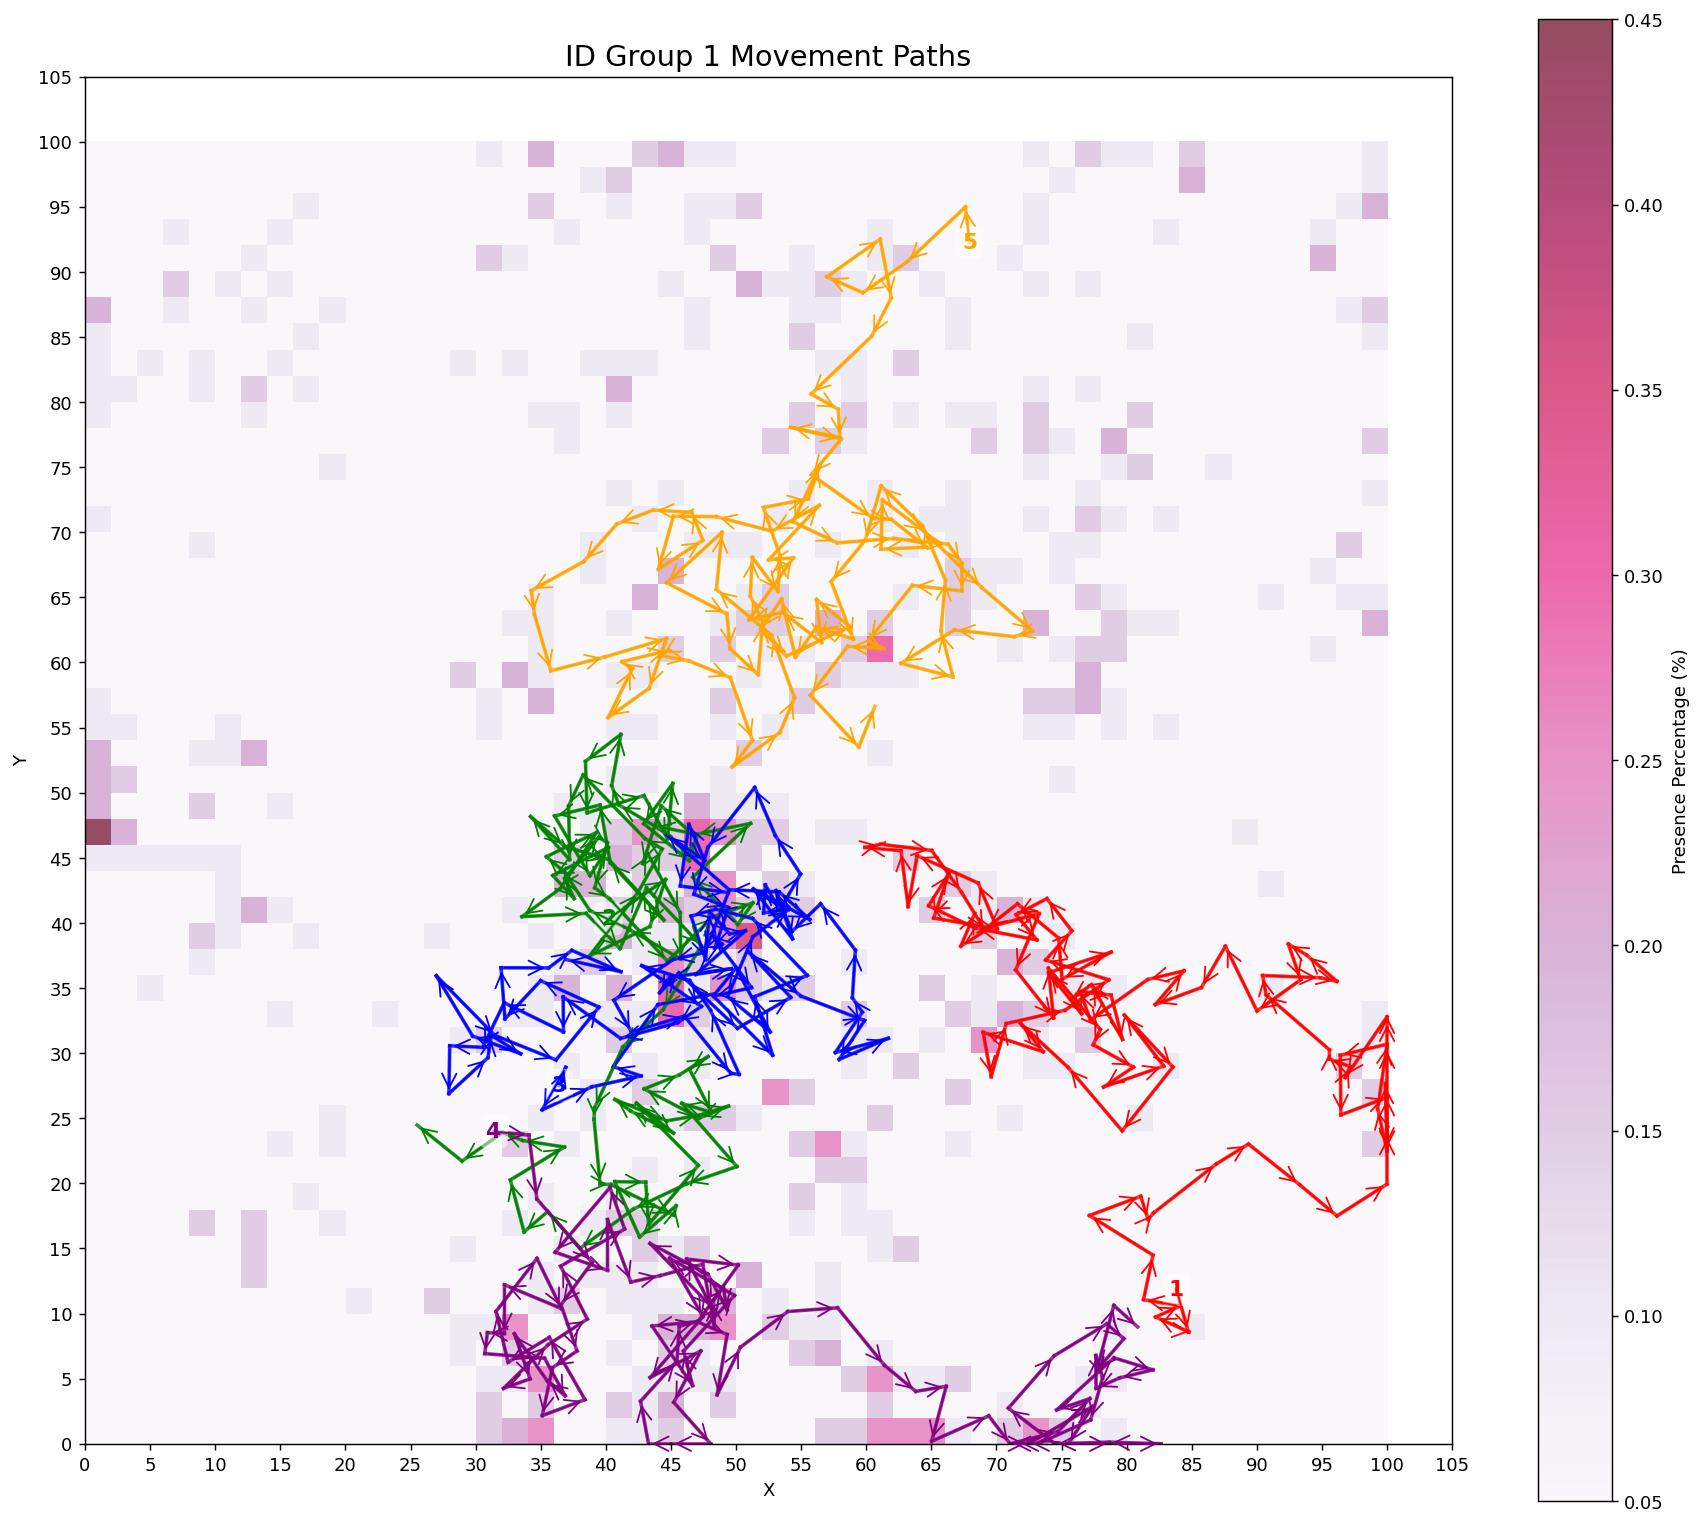

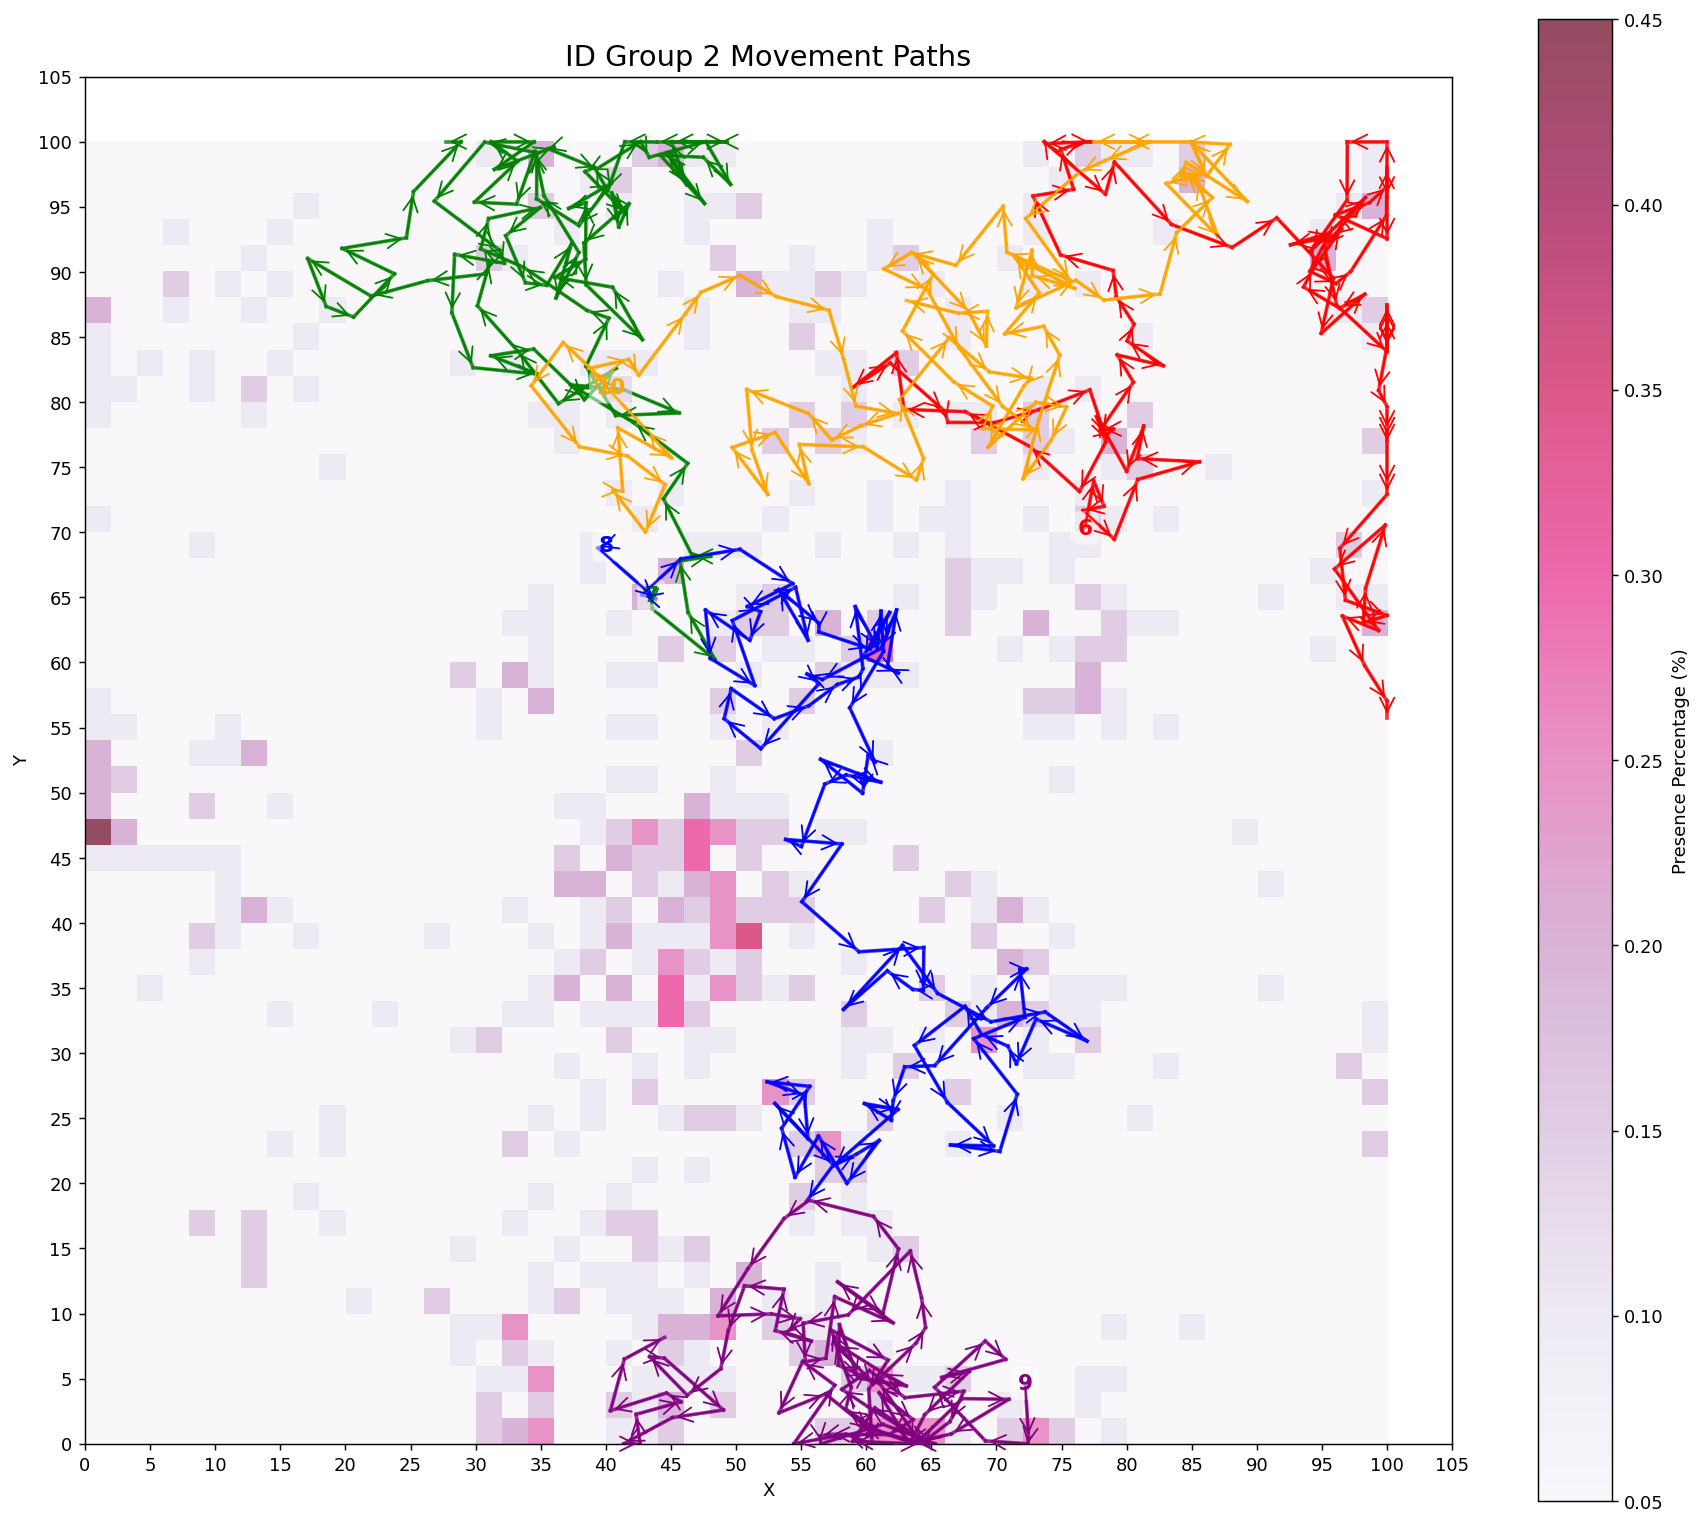

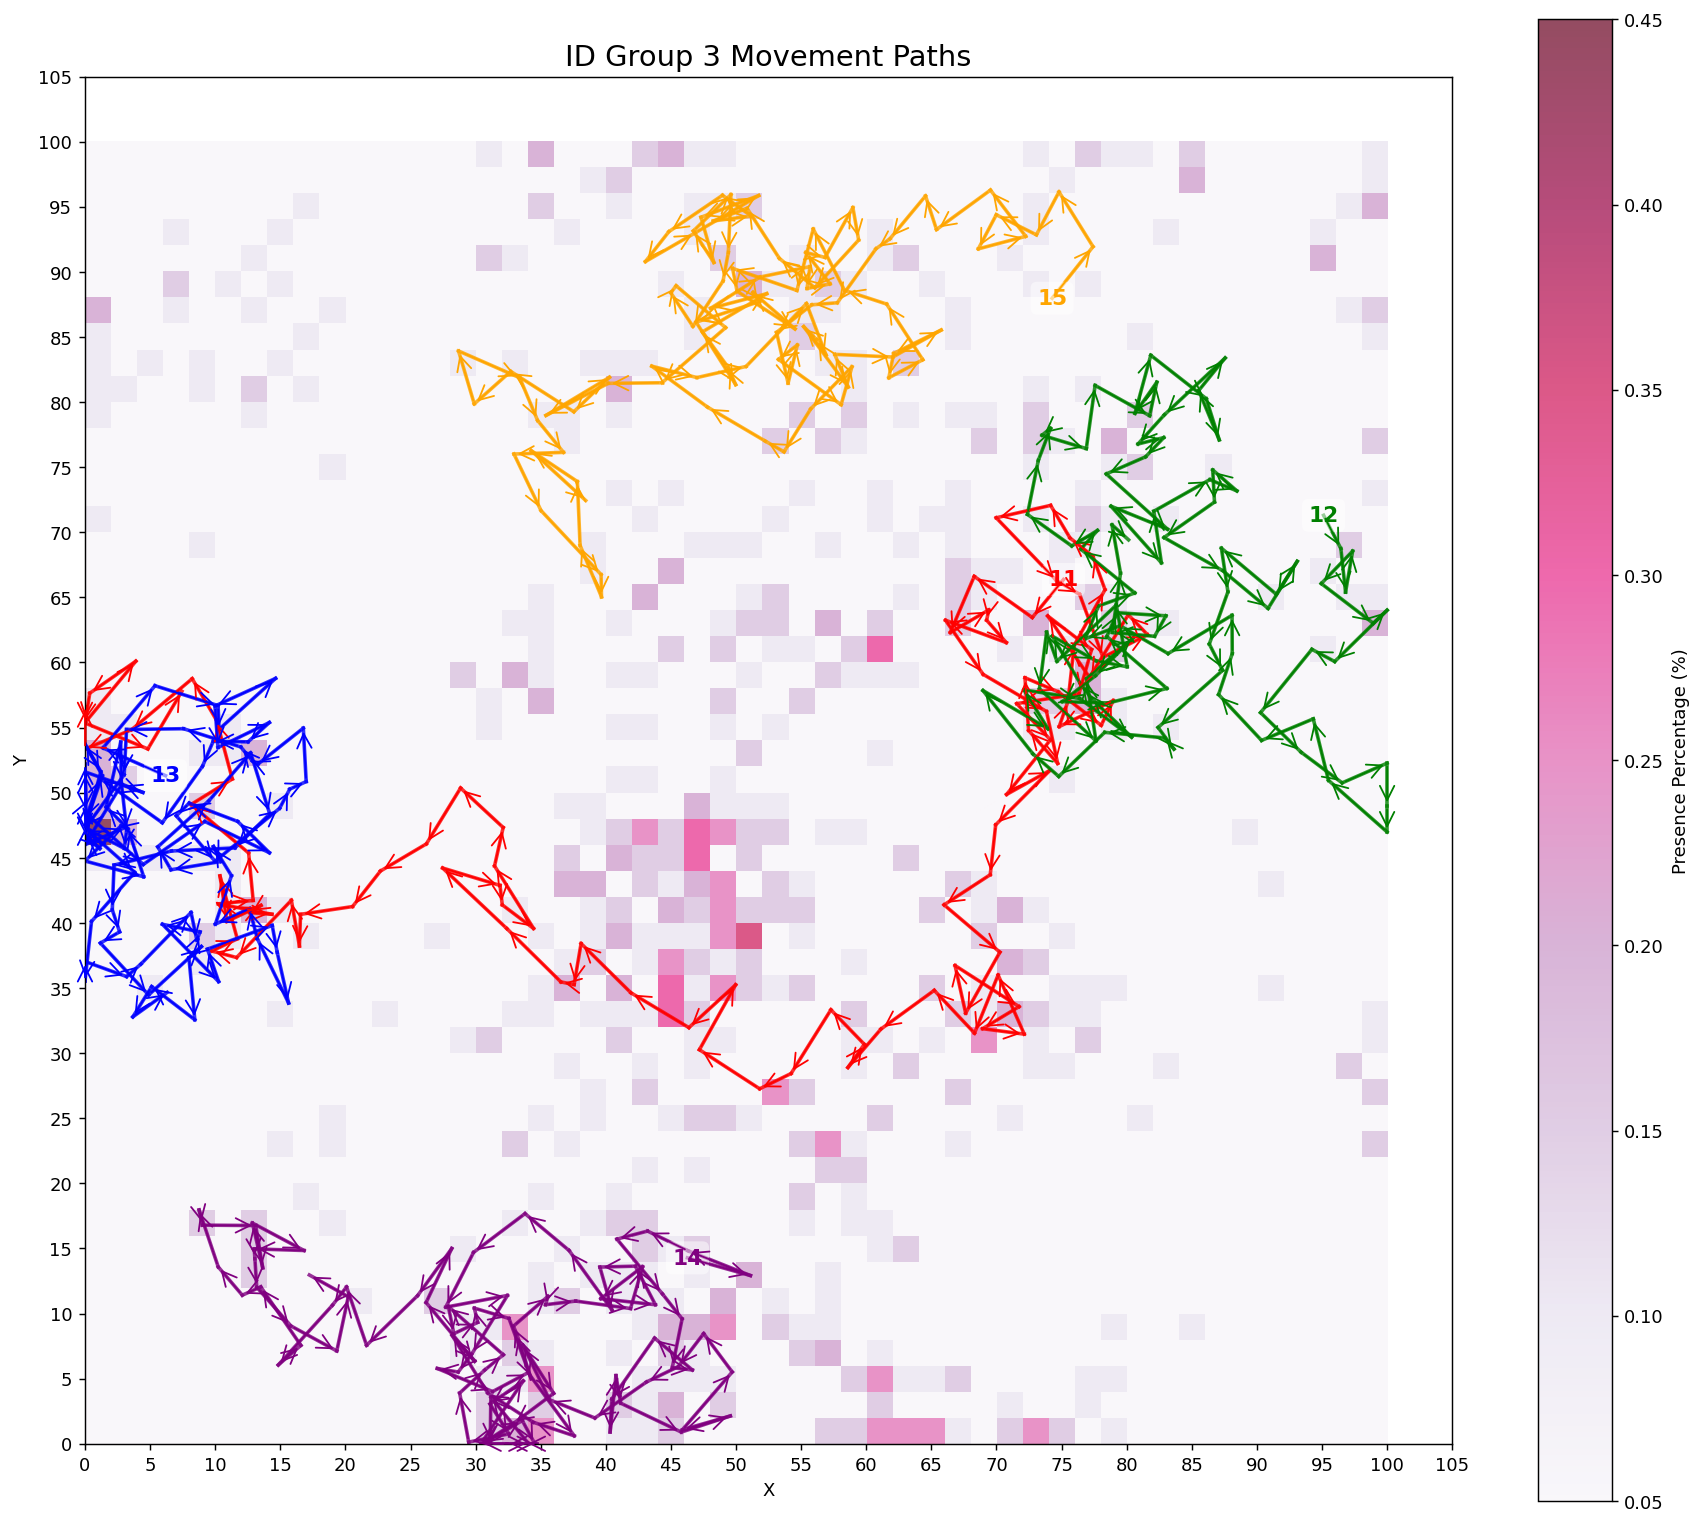

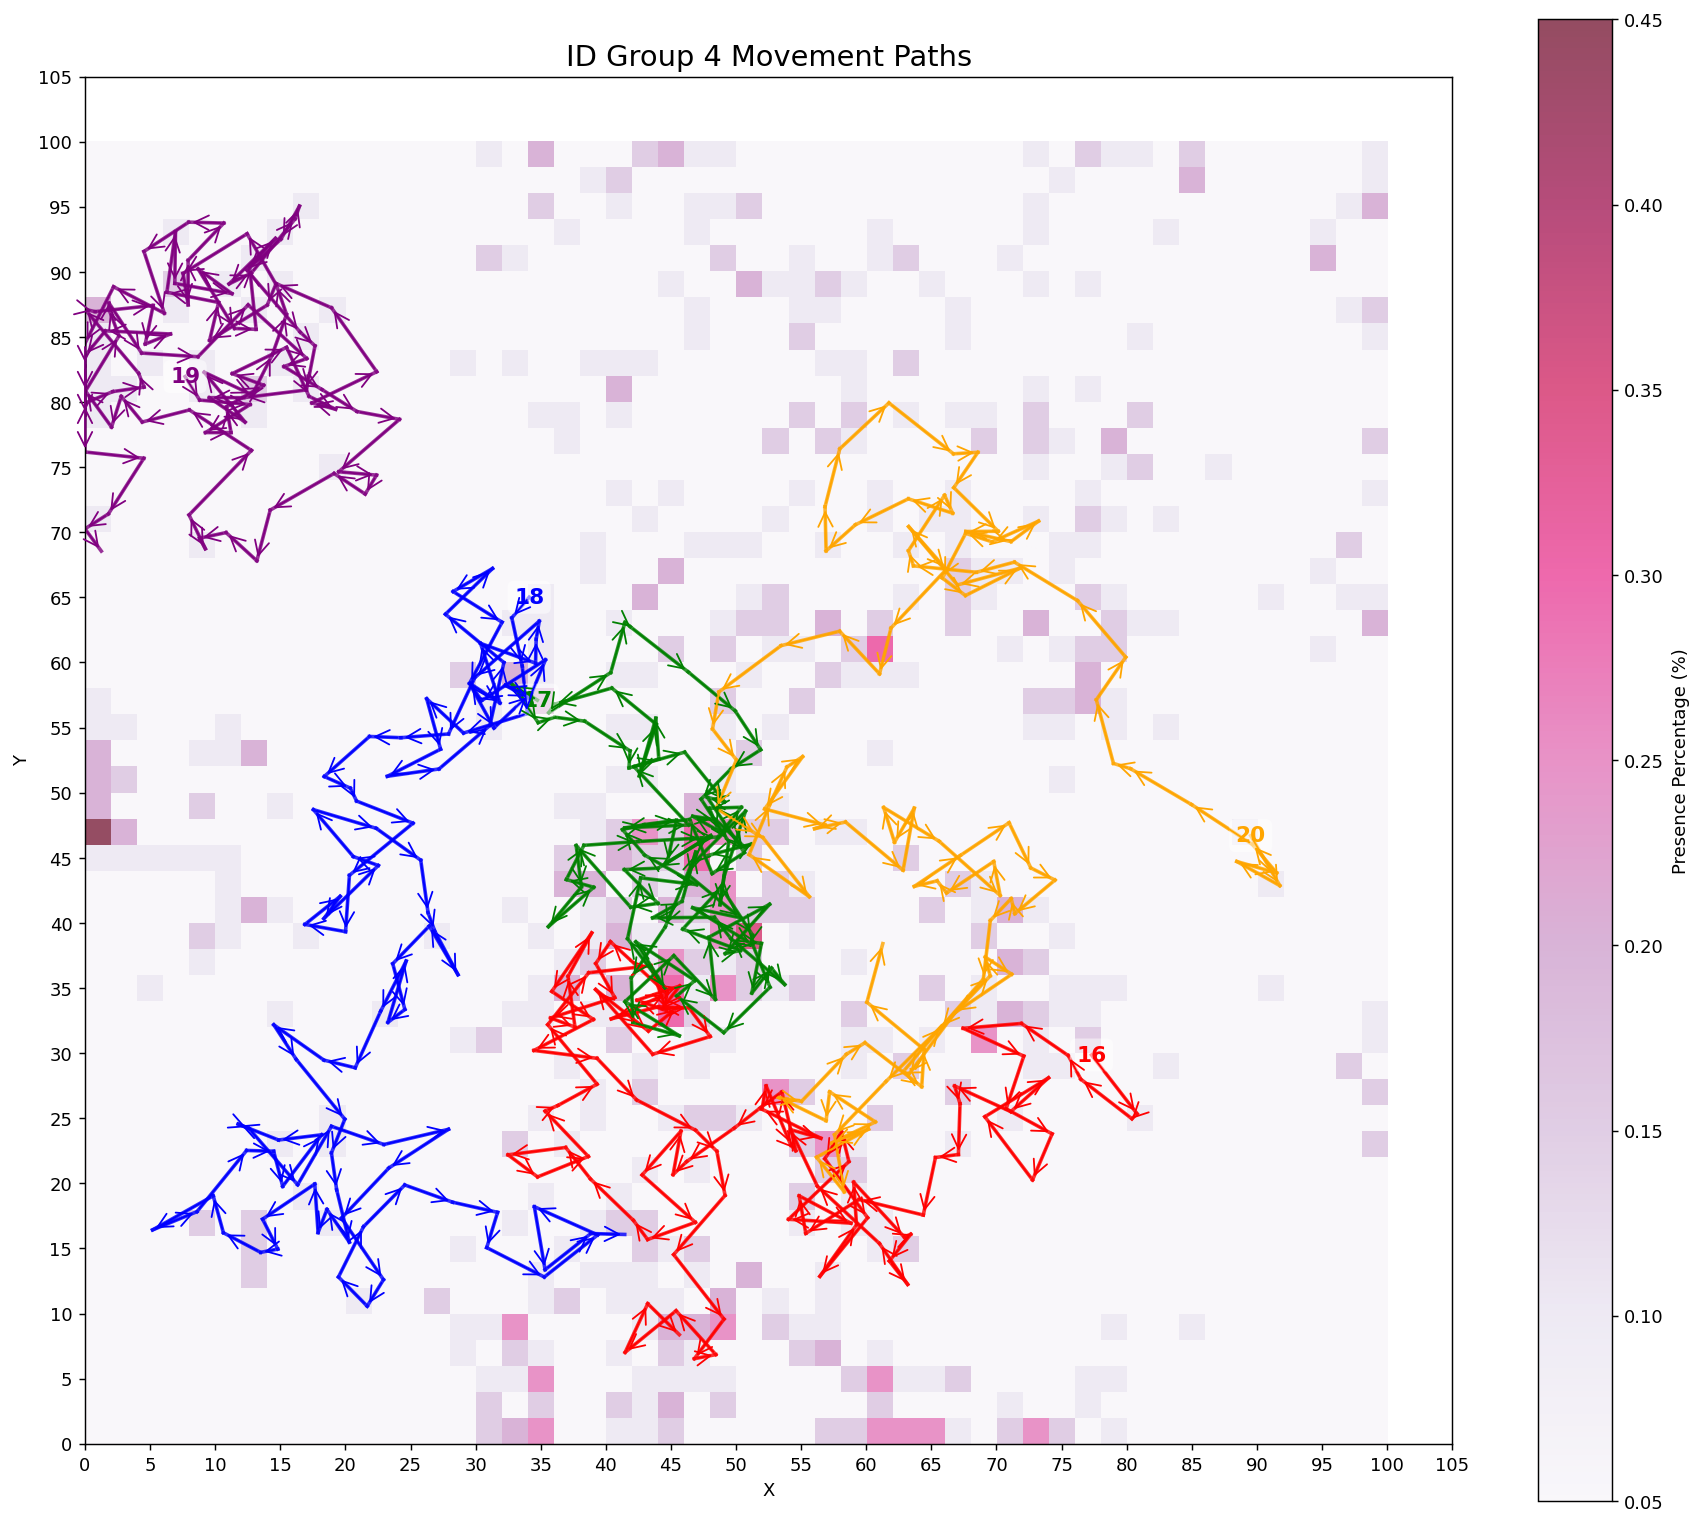

In [16]:
# =========================
# 動線色分け
# =========================  
clrs = [
    'red', 'green', 'blue', 
    'purple', 'orange', 'gold', 
    'lime', 'navy', 'pink', 
    'cyan', 'brown'
    ]
# =========================
# 背景ヒートマップデータ
# =========================
L_Len = len(df_result)

xedges = np.linspace(0,100,51)
yedges = np.linspace(0,100,51)

position_x = df_result['x']
position_y = df_result['y']

H, xedges, yedges = np.histogram2d(position_x, position_y, bins=(xedges, yedges))
H = (H / L_Len) * 100

# =========================
# 全IDを指定数ずつに分割
# =========================
id_list = list(df_d)

groups = [id_list[i:i+group_size] for i in range(0, len(id_list), group_size)]

# =========================
# 各グループでグラフ生成
# =========================
for grp_idx, id_group in enumerate(groups):
    fig, ax = plt.subplots(figsize=(14,12), dpi=130)

    # 背景ヒートマップ
    img = ax.imshow(
        H.T,
        origin='lower',
        cmap='PuRd',
        extent=[0,100,0,100],
        alpha=0.7,
        vmin=0.05
    )

    ax.set_xlim(0,100)
    ax.set_ylim(0,100)

    # カラーバー
    cbar = plt.colorbar(img, ax=ax)
    cbar.set_label('Presence Percentage (%)')

    # 動線描画
    for color_idx, current_id in enumerate(id_group):
        data_a = df_list.query('id == @current_id').sort_values('time_step')
        data_b = data_a.reset_index(drop=True)

        if len(data_b) > 0:
            line_color = clrs[color_idx % len(clrs)]
            oldx, oldy = None, None

            # スタート地点の座標
            startx = data_b.loc[0, 'x']
            starty = data_b.loc[0, 'y']

            # スタート地点にIDを描く
            ax.text(
                startx,
                starty,
                str(current_id),
                fontsize=12,
                color=line_color,
                weight='bold',
                ha='center',
                va='center',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle='round,pad=0.3')
            )

            for idx, row in data_b.iterrows():
                newx = row['x']
                newy = row['y']

                if oldx is not None:
                    # 線
                    ax.plot(
                        [oldx, newx],
                        [oldy, newy],
                        color=line_color,
                        linewidth=2,
                        alpha=0.8
                    )
                    # 矢印
                    ax.annotate(
                        '',
                        xy=(newx, newy),
                        xytext=(oldx, oldy),
                        arrowprops=dict(
                            arrowstyle="->",
                            color=line_color,
                            lw= 1,   # ラインの太さ                         
                            mutation_scale=20  # 矢印のサイズ　10:小.20:中.30:大
                        )
                    )
                oldx, oldy = newx, newy

    # 軸タイトル
    ax.set_title(f"ID Group {grp_idx + 1} Movement Paths", fontsize=16)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

    # 軸目盛りの刻み指定
    ax.set_xticks(np.arange(0, 110, 5))
    ax.set_yticks(np.arange(0, 110, 5))

    # 画像として保存
    plt.tight_layout()
    plt.savefig(f"{output_dpath}\\movement_group_{grp_idx+1}.png", dpi=130)
    plt.show()
    plt.close()